# Linear Regresison in TensorFlow

* https://www.udemy.com/course/google-cloud-machine-learning-with-tensorflow/learn/lecture/17073540#content

## Import packages

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.5.0'

## Loading data & preprocessing

In [3]:
%%bigquery flights_df --verbose
SELECT  date,
        airline,
        departure_airport,
        arrival_airpot,
        departure_lat,  # latitude
        departure_lon,  # longitude
        arrival_lat,
        arrival_lon,
        departure_deplay,
        arrival_delay
FROM 'bigquery-samples.airline_ontime_data.flights'
WHERE departure_airport = 'SFO' AND date >= '2009-01-01' AND date <= '2009-12-31'    
    

UsageError: Cell magic `%%bigquery` not found.


In [4]:
flights_df.shape

NameError: name 'flights_df' is not defined

In [ ]:
flights_df.head()

In [ ]:
flights_processed_df = ( flights_df
                         .query('1 <= departure_delay <= 120')
                         .dropna()
                         . filter(['departure_delay', 'arrival_delay'])
                       )

In [ ]:
(flights_processed_df
.sample(n = 100, random_state = 123)
.plot.scatter('departure_delay', 'arrival_delay'))

## Simple linear regression
### Training-testing split

In [ ]:
train_df = flights_processed_df.sample(frac=0.8, random_state=123)
test_df = flights_processed_df.drop(train_df.index)

train_labels = train_df.pop('arrival_delay')
test_labels = test_df.pop('arrival_delay')

### Building the model

In [ ]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential([
    
    # Adds a densely-connected layer with 1 unit to the model
    tf.keras.layers.Dense(1, activation = 'linear', input_shape = [len(train_df.keys())])
])
model.compile(optimizer = tf.keras.optimizers.RMSprop(),
              loss = 'mean_squared_error',
              metrics = ['mean_absolute_error', 'mean_squared_error'],
             )

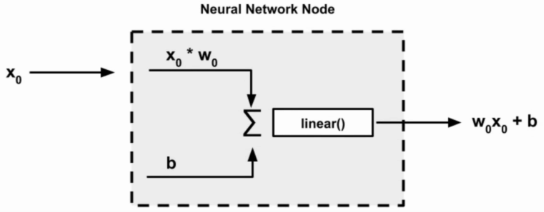

In [ ]:
model.summary()

In [ ]:
model.get_weights()

### Testing the model architecture
At this point, prediction is meaningless because the model has not been trained yet.

In [ ]:
example_batch = train_df[:5]
print(example_batch)

In [ ]:
model.predict(example_batch)

### Training the model

In [ ]:
history = model.fit(train_df, train_labels,
                    epochs = 10,
                    callbacks=[tf.keras.callbacks.TensorBoard('logs/simple-regression')])

In [ ]:
model.get_weights()

### Performance evaluation of simple regression on test data

In [ ]:
test_predictions = model.predict(test_df).flatten()
results_df = pd.DataFrame({'Predicted': test_predictions , 'Actual': test_labels })
results_df.head(5)

In [ ]:
results_df.sample(n = 200, random_state = 123).plot.scatter('Actual', 'Predicted')

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Departure_Delay]")
_ = plt.ylabel('Count')

In [ ]:
test_mae = abs(error).mean()

## Multiple linear regression

In [5]:
!pip install geopy

     |████████████████████████████████| 112 kB 1.9 MB/s eta 0:00:01


In [ ]:
import geopy.distance

coords_1 = [38.94, -77.46]
coords_2 = [40.77, -73.87]

In [ ]:
geopy.distance.distance(coords_1, coords_2).kim

In [ ]:
def corords_to_distance(row):
    corords_start = (row['departure_lat'], row['departure_lon'])
    corors_end    = (row['arrival_lat'], row['departure_lon'])
    distance = geopy.distance.distance(cords_start, coros_end).km
    
    return (distance)

Def get_route_key(row):
    (row['departure_lat'], row['departure_lon'])'] + row[]